In [10]:
print("Changing local")
import locale
print( locale.getlocale() )
locale.setlocale(locale.LC_ALL,"C")
print( locale.getlocale() )

Changing local
(None, None)
(None, None)


In [11]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Using o3prm syntax for creating BayesNet

In [12]:
bn=gum.loadBN("./Asia.o3prm",verbose=False)
gnb.showBN(bn,size="3")

In [13]:
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size="3")

In [ ]:
classpath="./ComplexPrinters"
filename=classpath+"/fr/lip6/printers/system.o3prm"
system="Work"
bn=gum.loadBN(filename,system=system,classpath=classpath)
#gnb.showBN(bn,size='10',format="svg")
gnb.showInference(bn,size="150",format='png')


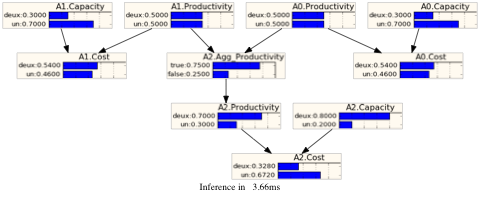

In [15]:
locale.setlocale(locale.LC_ALL,"C")
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size='5')
gnb.showInference(bn,size='5')

# Exploring Probabilistic Relational Model

In [19]:
classpath="./ComplexPrinters"
#filename=classpath+"/fr/lip6/printers/system.o3prm"
filename=classpath+"/complexprinters_system.o3prm"
#system="Work"
explor=gum.PRMexplorer(filename,classpath)

In [20]:
for cl in explor.classes():
    print("Class : "+cl)
    print("  - Super class : "+ ("None" if explor.getSuperClass(cl)==None else explor.getSuperClass(cl)) )
    print("  - Implemented interface : ")
    for inter in explor.classImplements(cl):
        print("      "+inter)
    print("  - Direct sub-types : ")
    for ext in explor.getDirectSubClass(cl):
        print("      "+ext)
    print("  - Attributes : ")
    for (t,n, depensons) in explor.classAttributes(cl):
        s = ""
        for depenson in depensons:
            s = s + depenson + " "
        print("      "+t+" "+n+" ("+s+")")
    print("  - References : ")
    for (t, n, isArray) in explor.classReferences(cl):
        print("      "+t+("[]" if isArray else "")+" "+n)
    print("  - Aggragates : ")
    for (t, n, g, l, slots) in explor.classAggregates(cl):
        s = ""
        for slot in slots:
            s = s + slot + " "
        print("      "+t+" "+n+" "+g+" "+("NoLabel" if l==None else l)+ " (" +s+")")
    print("  - SlotChains : ")
    for (t, n, isMultiple) in explor.classSlotChains(cl):
        print("      "+t+" "+n+" "+("[]" if isMultiple else ""))
    print("  - Parameters : ")
    for param in explor.classParameters(cl):
        print("      "+param)
    #print("  - Dag : ")
    #(dic, dotString) = explor.classDag(cl)
    #print(dic)
    #print(dotString)
    
    print()

Class : BWPrinter
  - Super class : None
  - Implemented interface : 
      Printer
  - Direct sub-types : 
  - Attributes : 
      t_paper hasPaper ()
      t_ink hasInk ()
      t_degraded equipState (room.power.state hasPaper hasInk )
  - References : 
      Room room
  - Aggragates : 
  - SlotChains : 
      t_state room.power.state 
  - Parameters : 

Class : ParamClass<lambda=0.4,t=4>
  - Super class : ParamClass
  - Implemented interface : 
  - Direct sub-types : 
  - Attributes : 
      t_paper hasPaper ()
      t_ink hasInk ()
      t_degraded equipState (hasInk room.power.state hasPaper )
  - References : 
      Room room
  - Aggragates : 
  - SlotChains : 
      t_state room.power.state 
  - Parameters : 
      lambda
      t

Class : PowerSupply
  - Super class : None
  - Implemented interface : 
  - Direct sub-types : 
  - Attributes : 
      t_state state ()
  - References : 
  - Aggragates : 
  - SlotChains : 
  - Parameters : 

Class : ColorPrinter
  - Super class : Non

In [24]:
gnb.showPotential(explor.cpf('Computer','equipState'))


In [25]:
for cl in explor.types():
    print("Type : "+cl)
    print("  - Super type : "+ ("None" if explor.getSuperType(cl)==None else explor.getSuperType(cl)) )
    print("  - Direct sub-types : ")
    for name in explor.getDirectSubTypes(cl):
        print("      "+name)
    print("  - Labels : ")
    for t in explor.getLabels(cl):
        print("      "+t)
    print("  - Labels mapping : ")
    for key,val in dict().items() if explor.getLabelMap(cl)==None else explor.getLabelMap(cl).items():
        print("      "+key+ ' -> '+val)
    print()

Type : boolean
  - Super type : None
  - Direct sub-types : 
      t_state
  - Labels : 
      false
      true
  - Labels mapping : 

Type : t_paper
  - Super type : t_state
  - Direct sub-types : 
  - Labels : 
      Ready
      Jammed
      Empty
  - Labels mapping : 
      Jammed -> NOK
      Empty -> NOK
      Ready -> OK

Type : mycount
  - Super type : None
  - Direct sub-types : 
  - Labels : 
      0
      1
      2
      3
      4
      5
  - Labels mapping : 

Type : t_degraded
  - Super type : t_state
  - Direct sub-types : 
  - Labels : 
      OK
      Dysfunctional
      Degraded
  - Labels mapping : 
      OK -> OK
      Degraded -> NOK
      Dysfunctional -> NOK

Type : t_state
  - Super type : boolean
  - Direct sub-types : 
      t_paper
      t_degraded
      t_ink
  - Labels : 
      OK
      NOK
  - Labels mapping : 
      OK -> true
      NOK -> false

Type : t_ink
  - Super type : t_state
  - Direct sub-types : 
  - Labels : 
      NotEmpty
      Empty
  - Labels

In [26]:
for cl in explor.interfaces():
    print("Interface : "+cl)
    print("  - Super interface : "+ ("None" if explor.getSuperInterface(cl)==None else explor.getSuperInterface(cl)) )
    print("  - Direct sub-interfaces : ")
    for name in explor.getDirectSubInterfaces(cl):
        print("      "+name)
    print("  - Implementations : ")
    for impl in explor.getImplementations(cl):
        print("      "+impl)
    print("  - Attributes : ")
    for (t,n) in explor.interAttributes(cl, allAttributes=True):
        print("      "+t+" "+n)
    print("  - References : ")
    for (t, n, isArray) in explor.interReferences(cl):
        print("      "+t+("[]" if isArray else "")+" "+n)
    print()

Interface : Equipment
  - Super interface : None
  - Direct sub-interfaces : 
      Printer
  - Implementations : 
      SafeComputer
      Computer
  - Attributes : 
      t_degraded equipState
      t_state equipState
      boolean equipState
  - References : 
      Room room

Interface : Printer
  - Super interface : Equipment
  - Direct sub-interfaces : 
  - Implementations : 
      BWPrinter
      ColorPrinter
  - Attributes : 
      boolean equipState
      boolean hasPaper
      boolean hasInk
      t_degraded equipState
      t_state equipState
  - References : 
      Room room



In [27]:
print(explor.isType("fr.lip6.printers.base.Printer"))
print(explor.isClass("fr.lip6.printers.base.Printer"))
print(explor.isInterface("fr.lip6.printers.base.Printer"))

False
False
False
